# CS4168 Project
## Spotify Data Mining
* Cathal Crowe - 21320128
* Robert Flanagan - 21311625
* Mohd Humayun - 21332207
* Steven Lavelle - 21316945
* Oluwadara Fatoki - 21234639

# Importing Modules and Dataset

In [65]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import set_config, manifold, cluster, preprocessing
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.pipeline import Pipeline
from sklearn.cluster  import KMeans
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingClassifier
from sklearn.linear_model import LinearRegression

from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import (
    FunctionTransformer,
    StandardScaler,
    OneHotEncoder
)

from kneed import KneeLocator

from sklearn import manifold, cluster, metrics, neighbors


# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn import set_config
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("tracks.csv")

# Exploratory Data Analysis (EDA)

In [10]:
df.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [11]:
df.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


 data set contains 1500 rows of data with a mix of catgorical and numerical data, with a majority being numerical

In [12]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


 no missing values within the dataset

<Axes: >

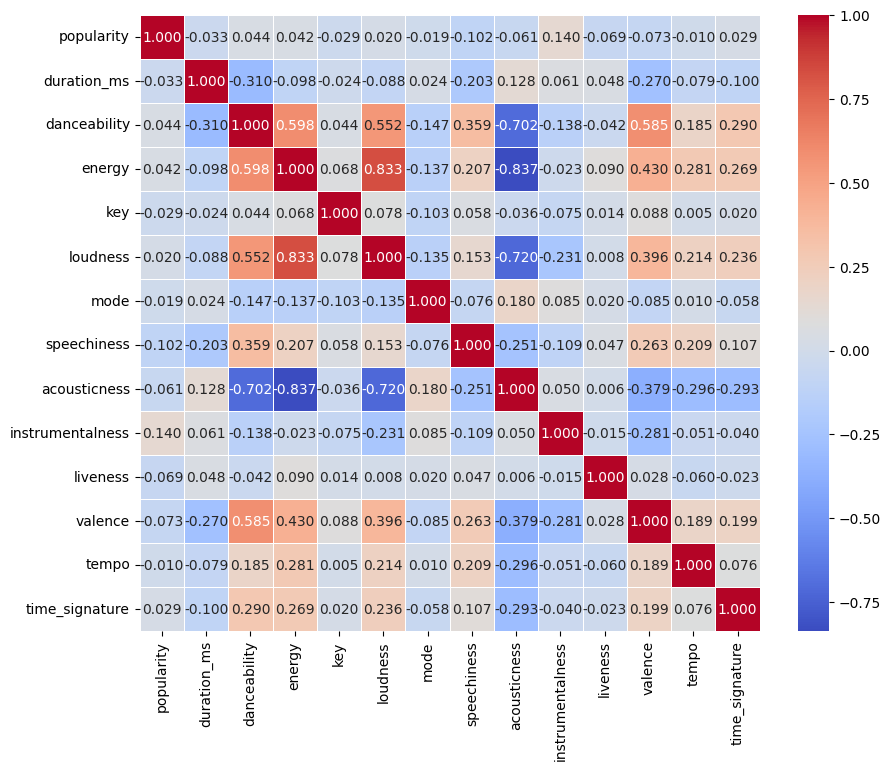

In [13]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

there is a healthy mix of correlation between the vlaues, with some of the highest correlation being between `energy` and `danceability`, `energy` and `loudness`, `energy` and `valence` and `danceability` and `loudness`

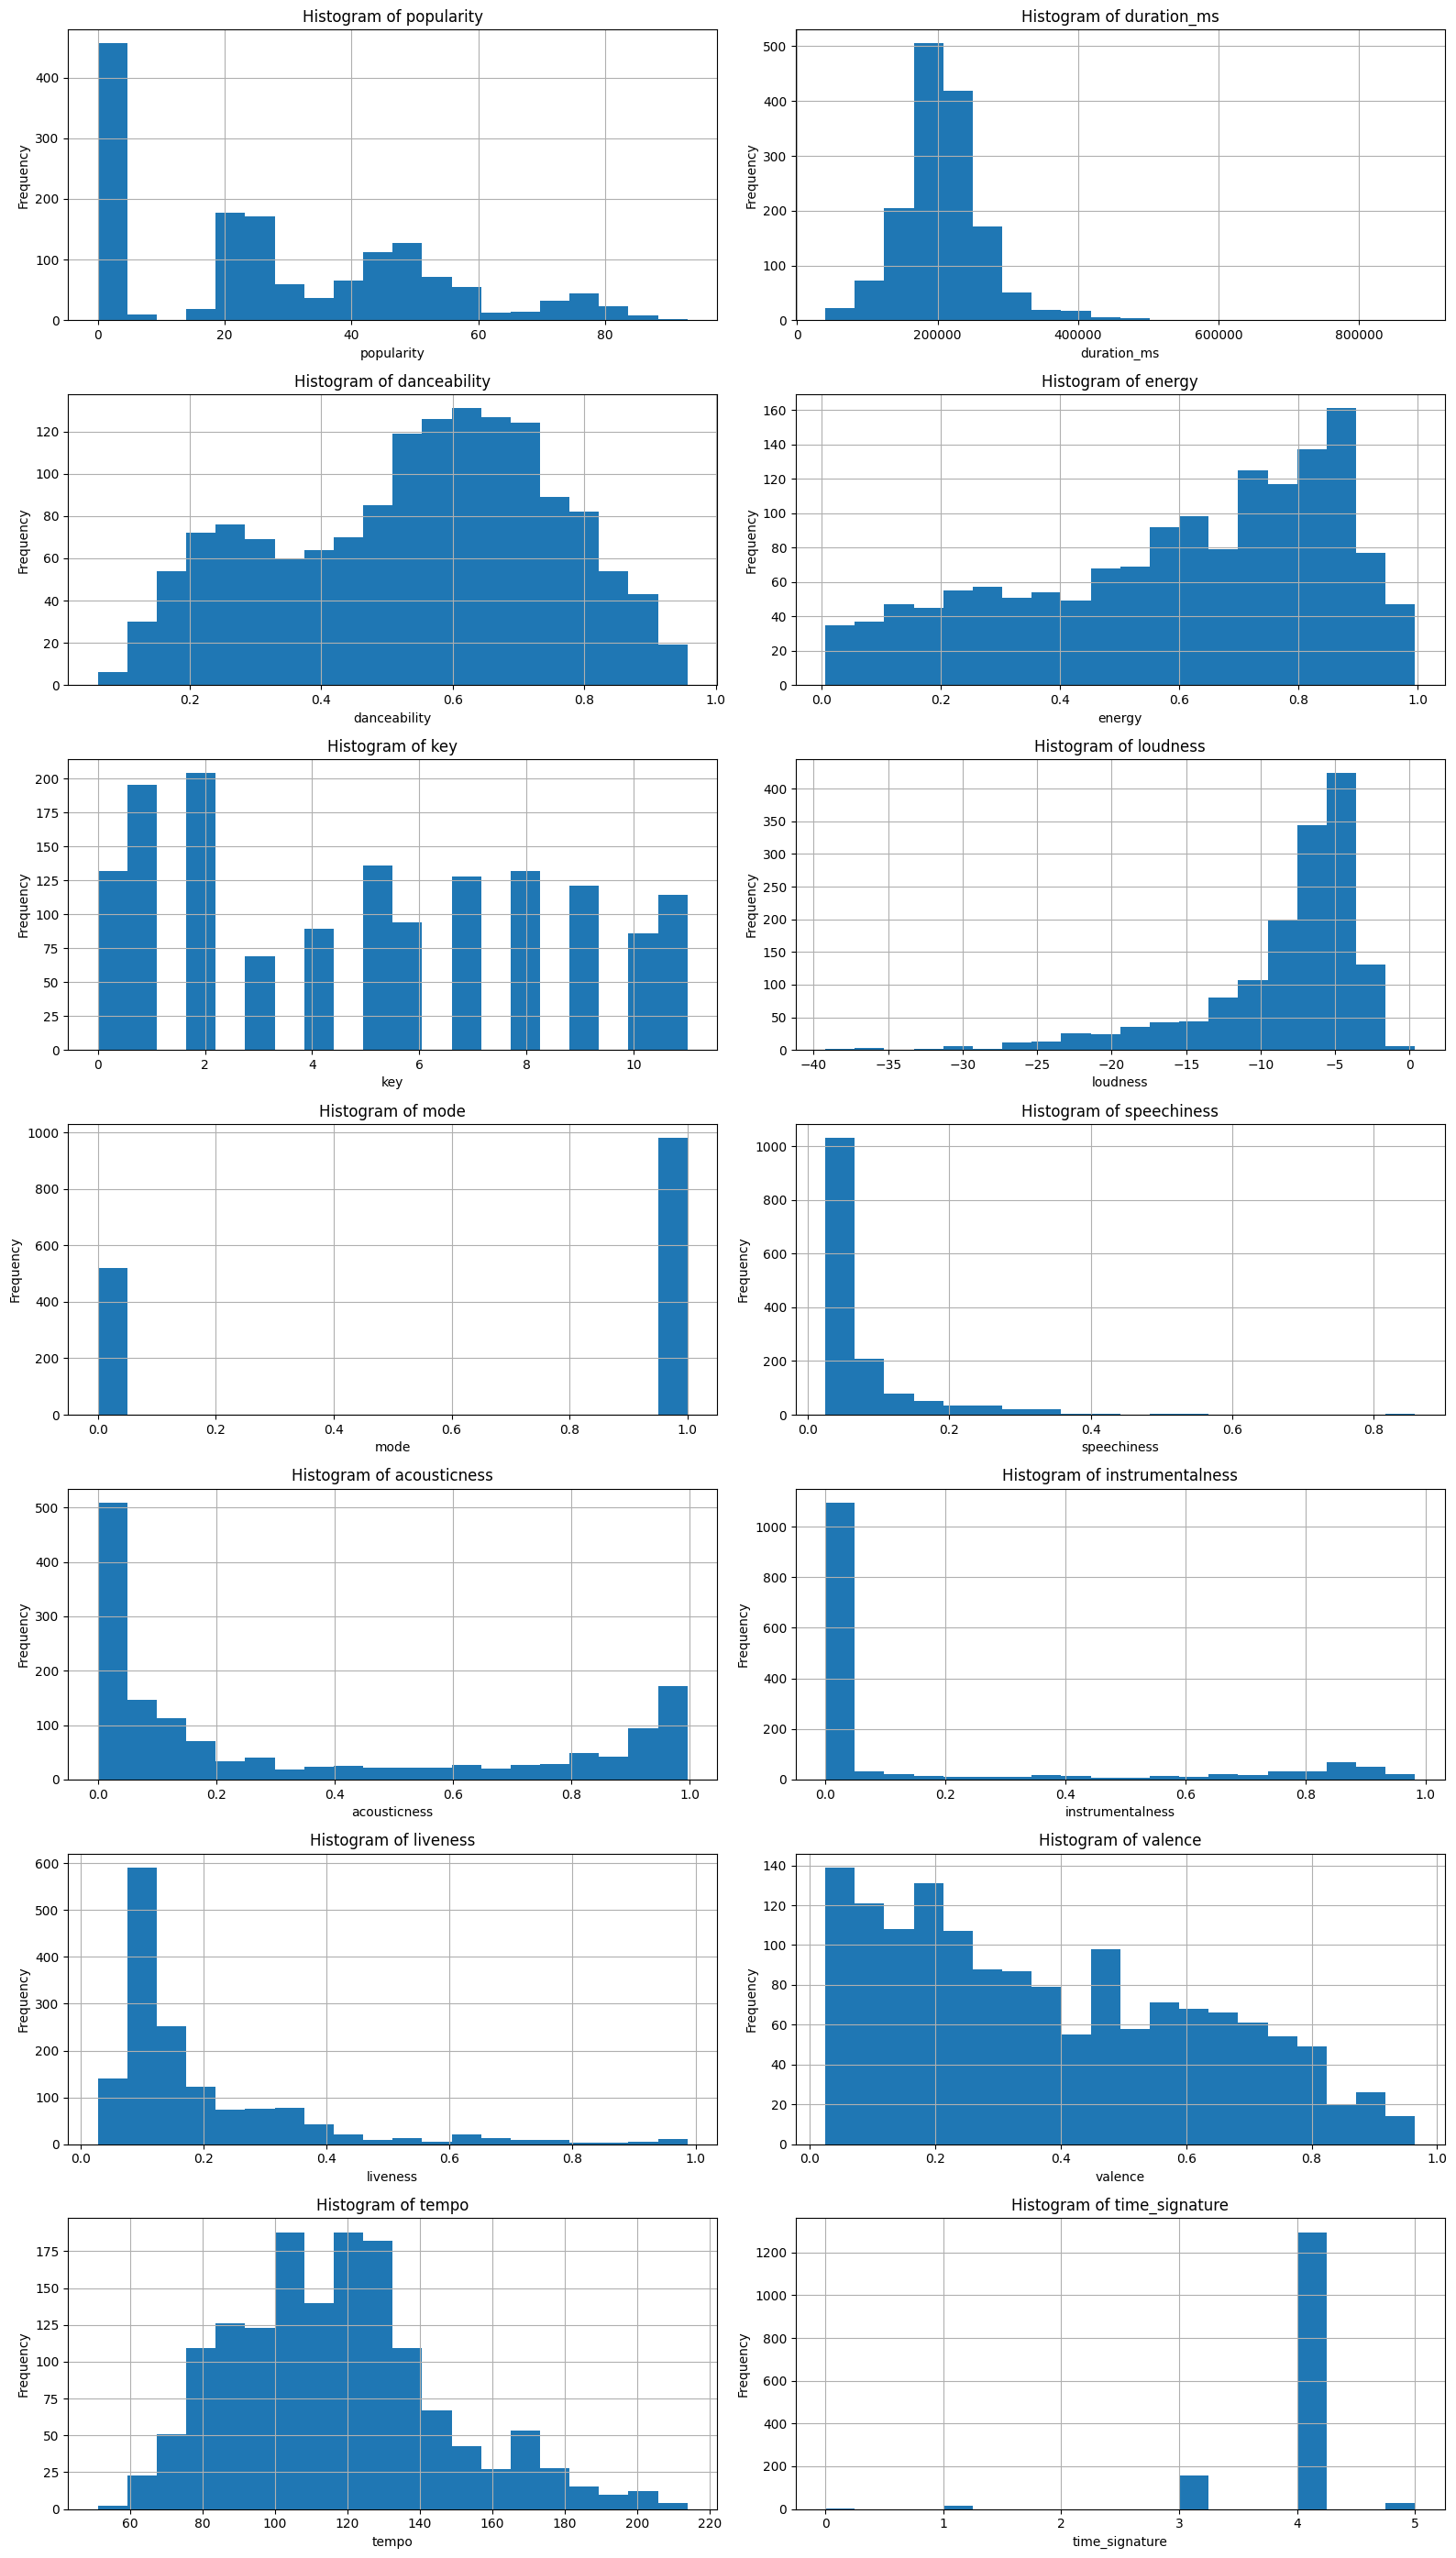

In [14]:

# List of features to plot
features = [
    "popularity", "duration_ms", "danceability", "energy", "key", "loudness",
    "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "time_signature"
]

# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()

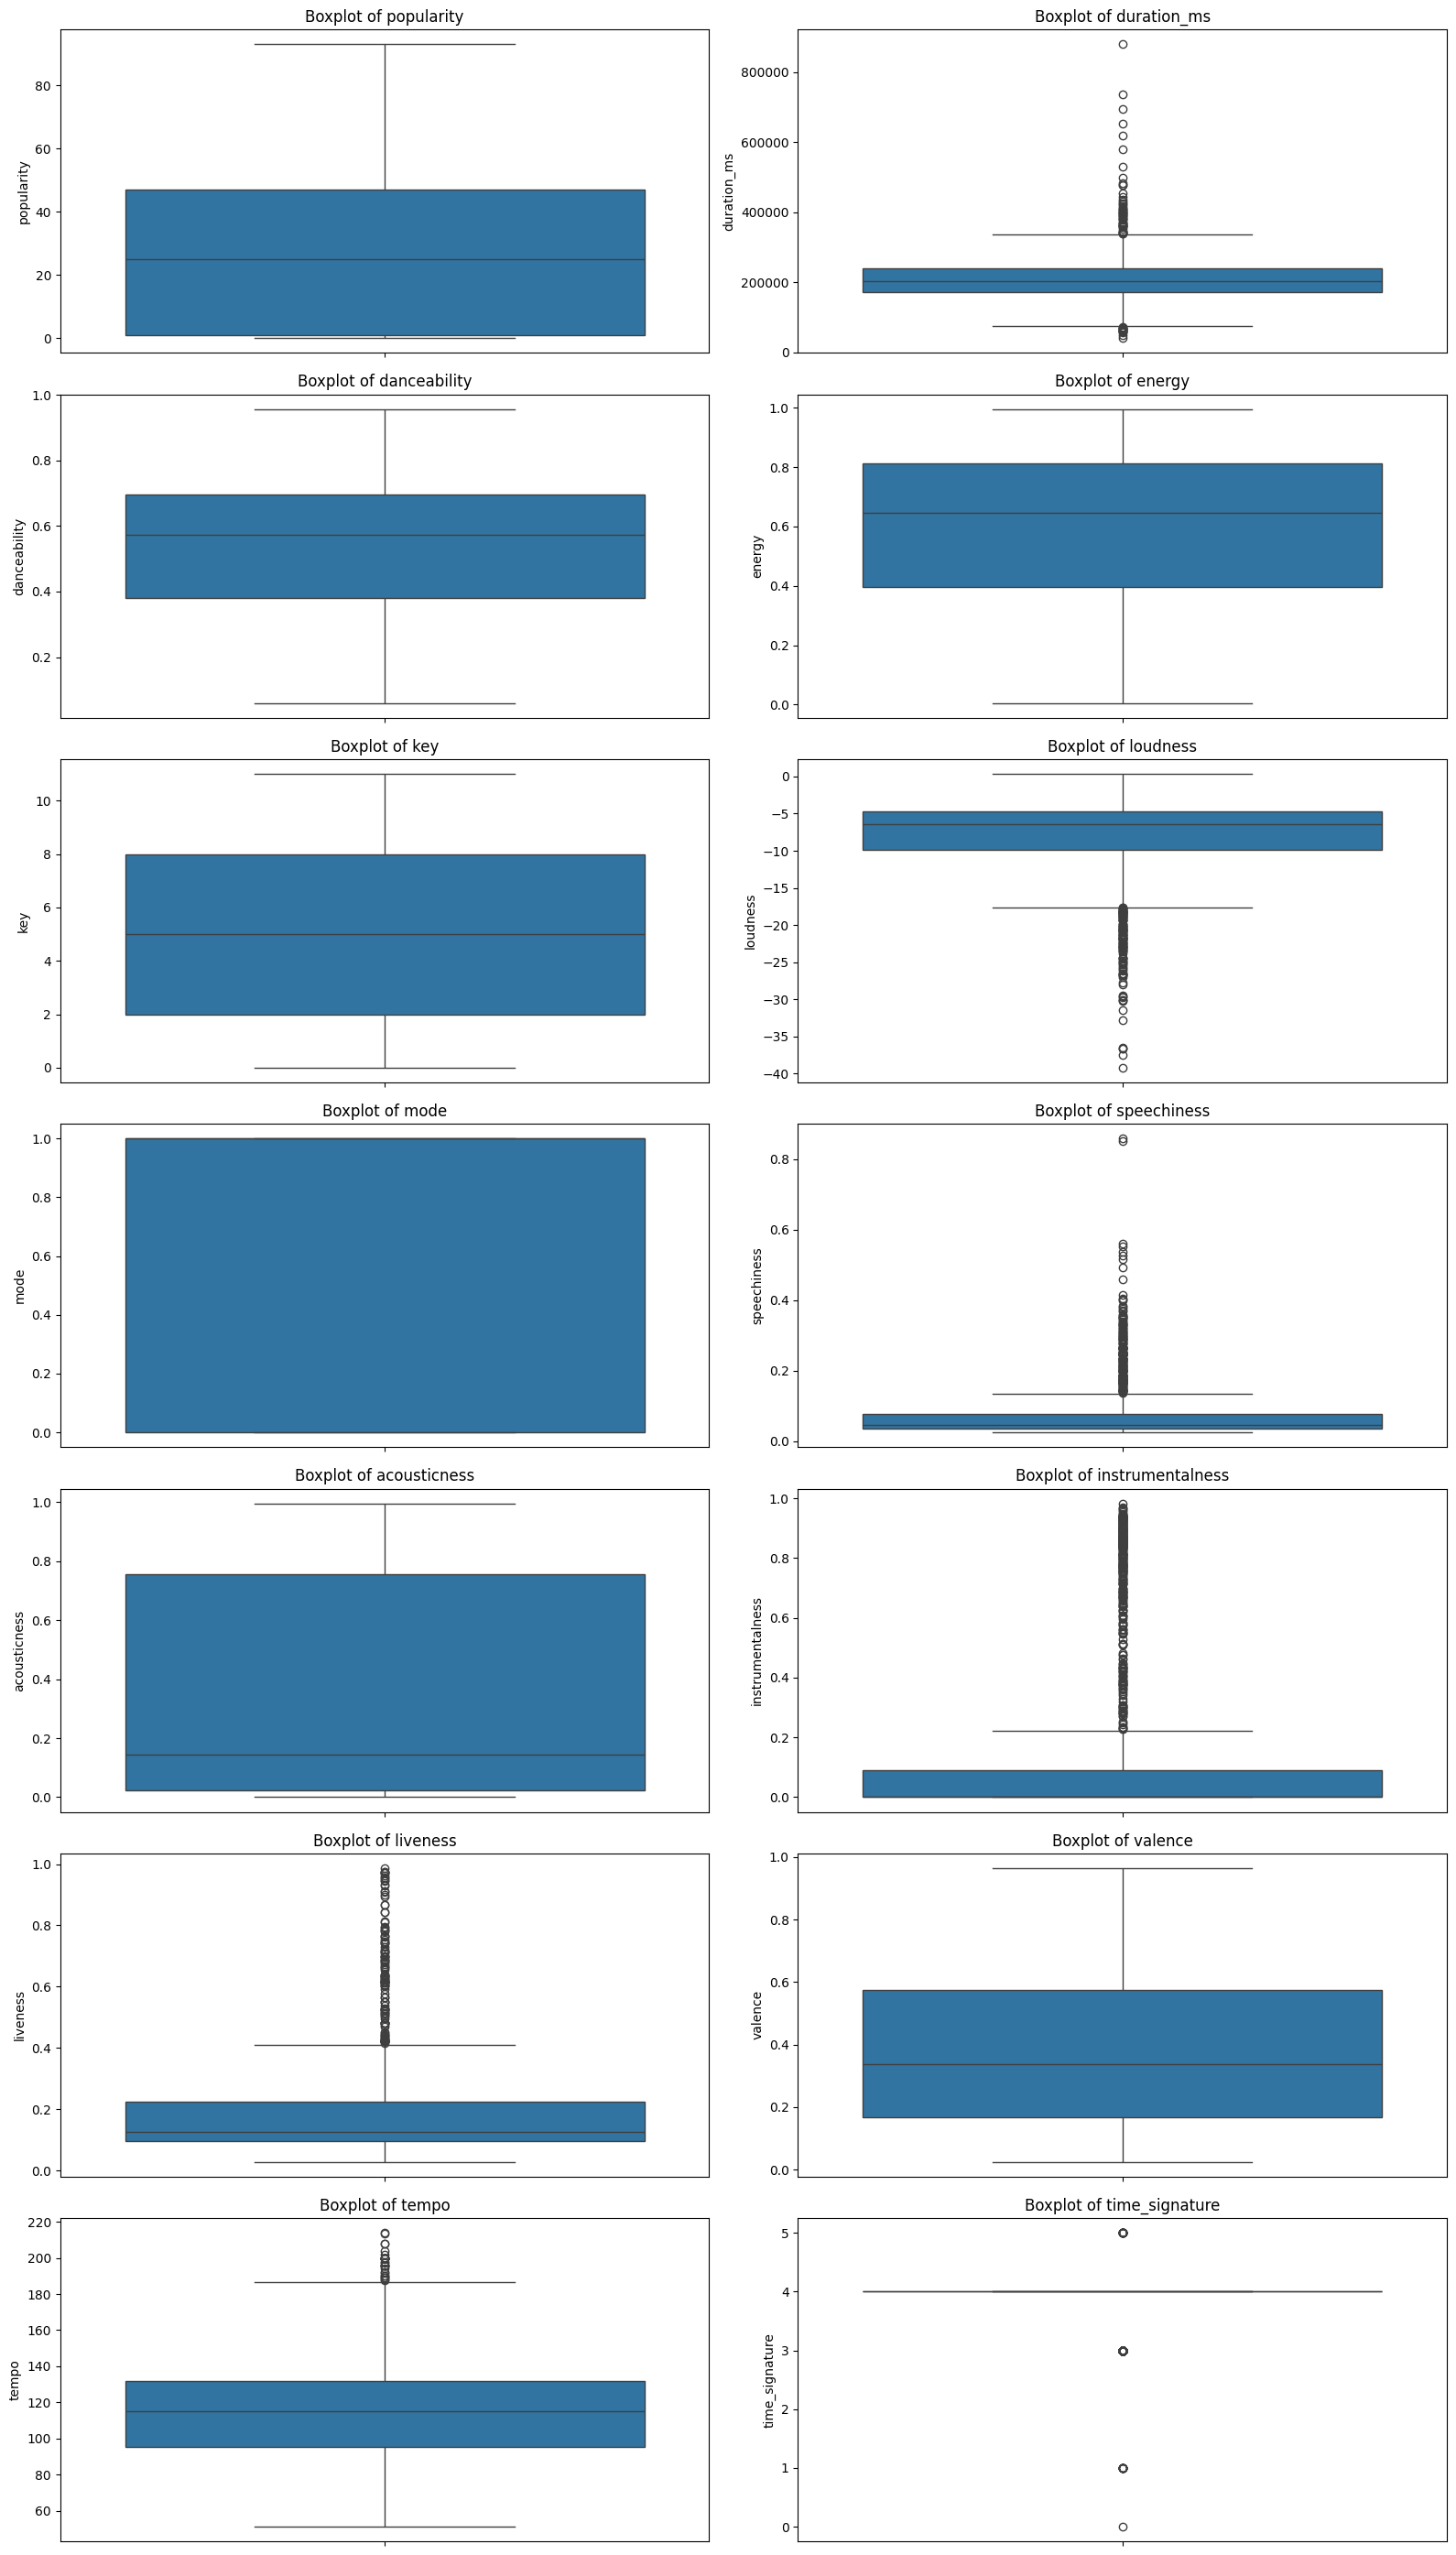

In [15]:
# Calculate the number of rows needed for 2 columns per row
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size
fig = plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(f"Boxplot of {feature}")
    ax.set_xlabel('')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

there are considerable outliers within the fields of `liveliness`,`tempo`, `duration`, `speechiness`,`instrumentalness`

In [16]:
df['track_genre'].value_counts()

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

there is an equal distribution among the gengres within the dataset

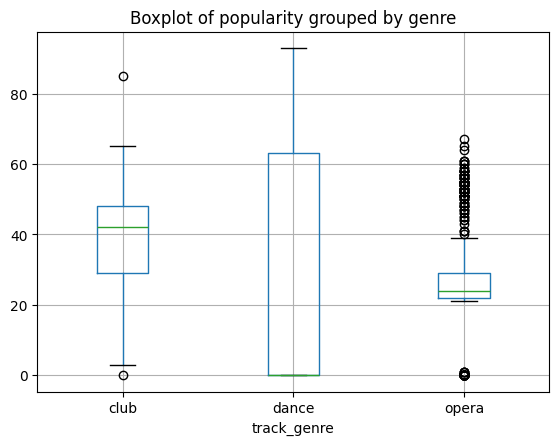

In [17]:
df.boxplot(column='popularity', by='track_genre')
plt.title('Boxplot of popularity grouped by genre')
plt.suptitle("")
plt.show()

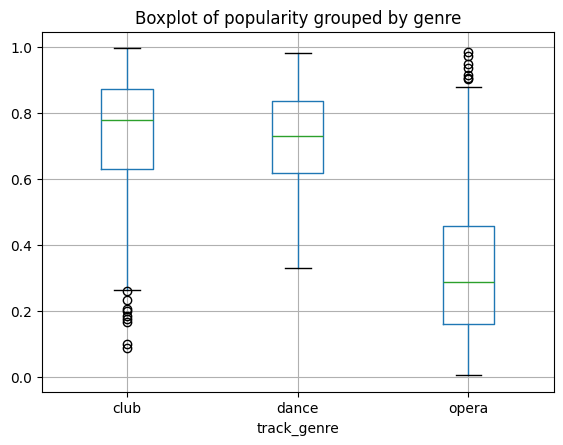

In [ ]:
df.boxplot(column='energy', by='track_genre')
plt.title('Boxplot of energy grouped by ')
plt.suptitle("")
plt.show()

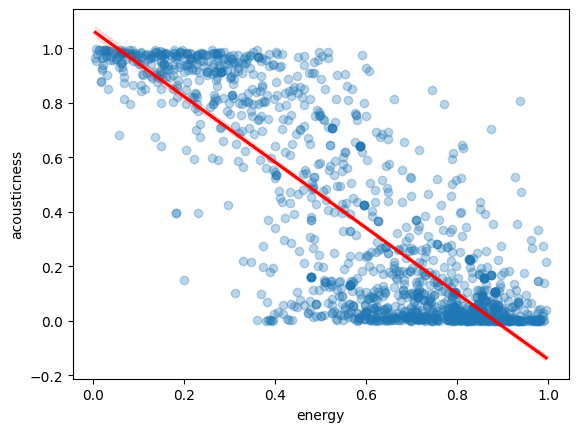

In [19]:
sns.regplot(data=df, x='energy', y='acousticness', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()

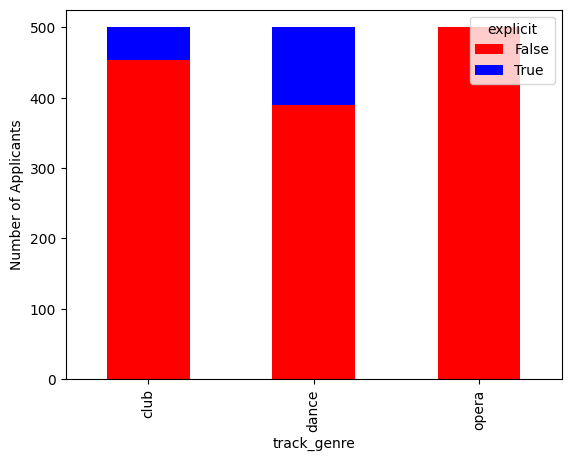

In [20]:
crosstab_CGL = pd.crosstab([ df['track_genre']], df['explicit'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

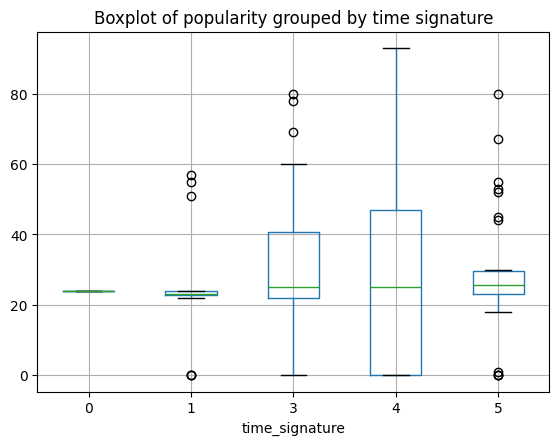

In [21]:
df.boxplot(column='popularity', by='time_signature')
plt.title('Boxplot of popularity grouped by time signature')
plt.suptitle("")
plt.show()

In [22]:
df['time_signature'].value_counts()

time_signature
4    1295
3     158
5      30
1      16
0       1
Name: count, dtype: int64

In [23]:
df['key'].value_counts()

key
2     204
1     195
5     136
0     132
8     132
7     128
9     121
11    114
6      94
4      89
10     86
3      69
Name: count, dtype: int64

In [24]:
df['mode'].value_counts()

mode
1    981
0    519
Name: count, dtype: int64

In [25]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [26]:
df.value_counts('track_genre')

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

# Data preparation

In [27]:
one_hot = pd.get_dummies(df['track_genre'])
df = df.join(one_hot)
df = df.drop(columns=['track_genre'])


In [28]:
print(df.head())


   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          85       202093      True         0.658   0.671    2   -12.210   
1          49       215973     False         0.627   0.505    6   -12.659   
2          65       188160     False         0.807   0.835    9    -6.849   
3          59       233965     False         0.748   0.549    6    -5.447   
4          55       187173     False         0.683   0.869    0    -4.828   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0363       0.09330          0.000927    0.1150    0.166   
1     1       0.0549       0.19700          0.014900    0.0583    0.146   
2     0       0.0631       0.00148          0.527000    0.2330    0.349   
3     0       0.0650       0.00268          0.792000    0.1960    0.197   
4     1       0.0515       0.00088          0.836000    0.2060    0.219   

     tempo  time_signature  club  dance  opera  
0  100.966               4  True  Fal

In [29]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
club                0
dance               0
opera               0
dtype: int64

In [30]:
df['time_signature'] = df['time_signature']/5
df['key'] = df['key']/11

In [31]:
# 1) define your feature lists and preprocessor exactly as before
skewed_feats  = ["duration_ms","tempo","liveness",
                 "instrumentalness","speechiness","acousticness"]
cube_feats    = ["loudness"]
simple_feats  = ["danceability","energy","valence"]

skew_pipe = Pipeline([
    ("log1p",    FunctionTransformer(np.log1p, validate=False)),
    ("scaler",   StandardScaler())
])
cube_pipe = Pipeline([
    ("cuberoot", FunctionTransformer(np.cbrt,   validate=False)),
    ("scaler",   StandardScaler())
])
simple_pipe = Pipeline([
    ("scaler",   StandardScaler())
])

preprocessor = ColumnTransformer([
    ("skewed", skew_pipe,   skewed_feats),
    ("cube",   cube_pipe,   cube_feats),
    ("simple", simple_pipe, simple_feats),
])

# 2) apply it in‑place to df
num_cols = skewed_feats + cube_feats + simple_feats

# fit & transform
X_trans = preprocessor.fit_transform(df[num_cols])

# put it straight back into the original DataFrame
df[num_cols] = X_trans

# now your df has those columns replaced by their log/cube‑root + scaled versions
print(df[num_cols].describe().loc[['mean','std']])


       duration_ms         tempo      liveness  instrumentalness  \
mean -2.160050e-15 -2.065311e-15 -3.789561e-17      1.894781e-17   
std   1.000334e+00  1.000334e+00  1.000334e+00      1.000334e+00   

       speechiness  acousticness      loudness  danceability        energy  \
mean  3.789561e-17  1.136868e-16 -4.926430e-16  7.579123e-17 -3.789561e-17   
std   1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00   

           valence  
mean -1.515825e-16  
std   1.000334e+00  


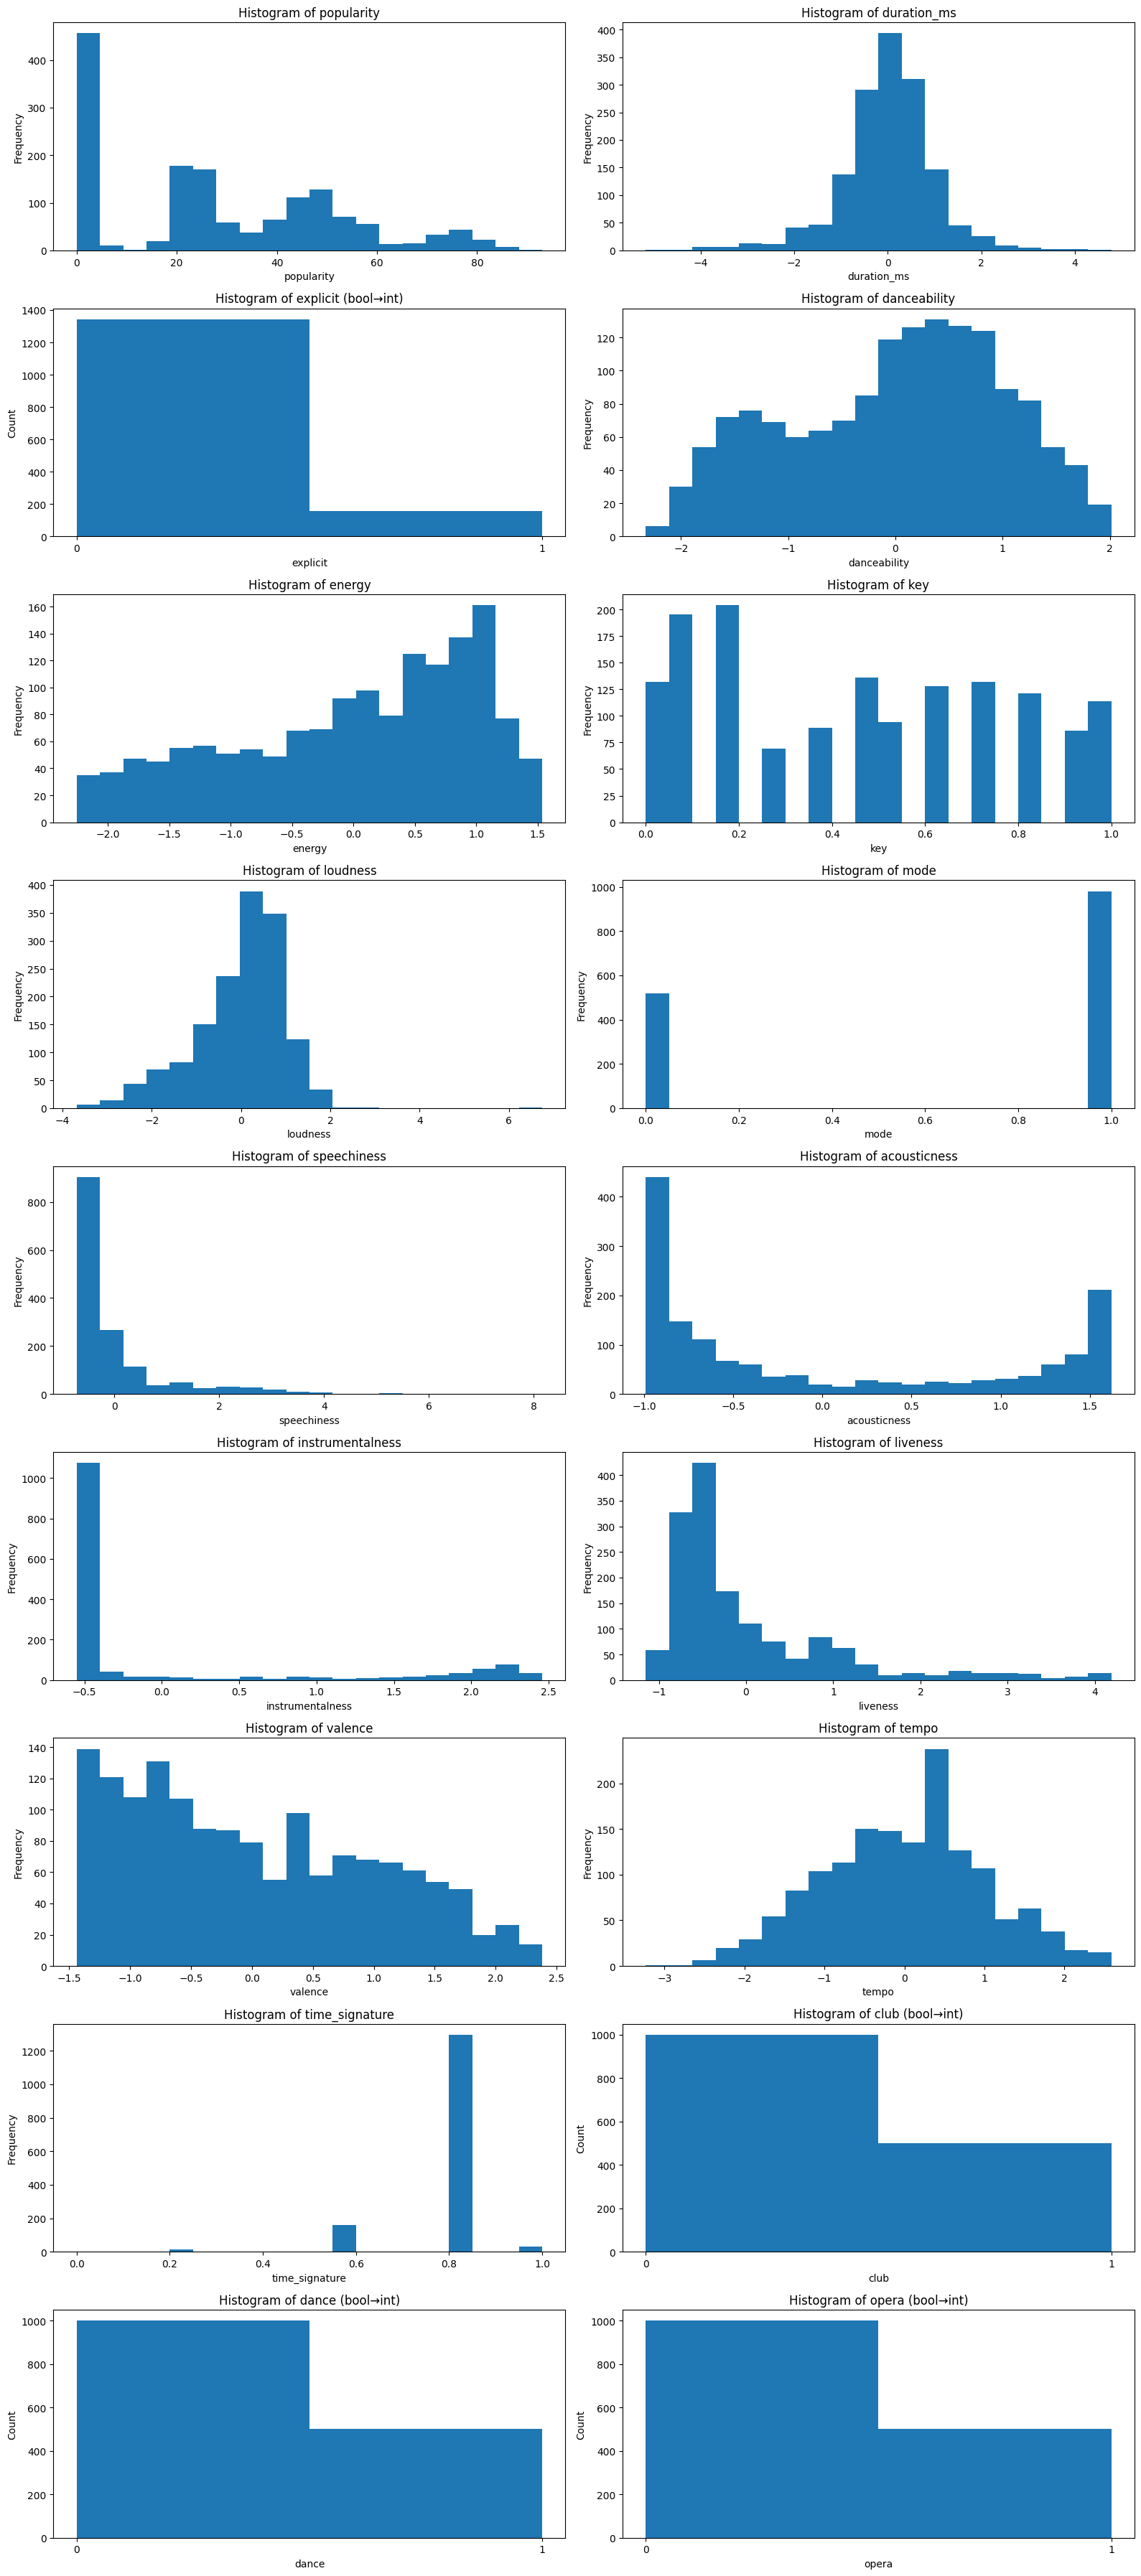

In [32]:
# 1) List all columns
features_all = df.columns.tolist()

# 2) Compute rows for 2‐column layout
num_rows = math.ceil(len(features_all) / 2)

# 3) Create the subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows), squeeze=False)
axes = axes.flatten()

# 4) Loop through every column
for i, feat in enumerate(features_all):
    ax = axes[i]
    series = df[feat]

    # If it's boolean, cast to int before histogram
    if series.dtype == "bool":
        ax.hist(series.astype(int), bins=2)
        ax.set_xticks([0,1])
        ax.set_title(f"Histogram of {feat} (bool→int)")
        ax.set_xlabel(feat)
        ax.set_ylabel("Count")

    # If it's non‑numeric (object or category), do a bar chart of value counts
    elif not np.issubdtype(series.dtype, np.number):
        vc = series.value_counts()
        ax.bar(vc.index.astype(str), vc.values)
        ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")
        ax.set_title(f"Bar chart of {feat}")
        ax.set_ylabel("Count")

    # Otherwise it’s numeric: do a histogram
    else:
        ax.hist(series, bins=20)
        ax.set_title(f"Histogram of {feat}")
        ax.set_xlabel(feat)
        ax.set_ylabel("Frequency")

# 5) Turn off any unused axes (if you had an odd number of columns)
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [33]:
# Clustering

In [333]:
# Drop the genre columns to avoid revealing the clusters
df = df.drop(columns=['club', 'dance', 'opera'])

# Shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (1500, 15)


In [ ]:
# Scatterplot for clustered data
def clustering_scatterplot(points, labels, centers, title):
    n_clusters = np.unique(labels[labels != -1]).size  # Exclude noise (-1) from cluster count
    colors = np.array(["orange", "blue", "lime", "khaki", "pink", "green", "purple"])
    
    # Plot noise points if they exist
    if -1 in labels:
        plt.scatter(points[labels == -1, 0], 
                    points[labels == -1, 1], 
                    c="gray", 
                    label="Noise")
    
    # Plot clusters
    for i in range(n_clusters):
        plt.scatter(points[labels == i, 0], 
                    points[labels == i, 1], 
                    c=colors[i % colors.size], 
                    label=f"Cluster {i}")
    
    # Plot cluster centers if provided
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c="r", marker="*", s=500, label="Centers")
    
    plt.title(title)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

## K-Means Clustering

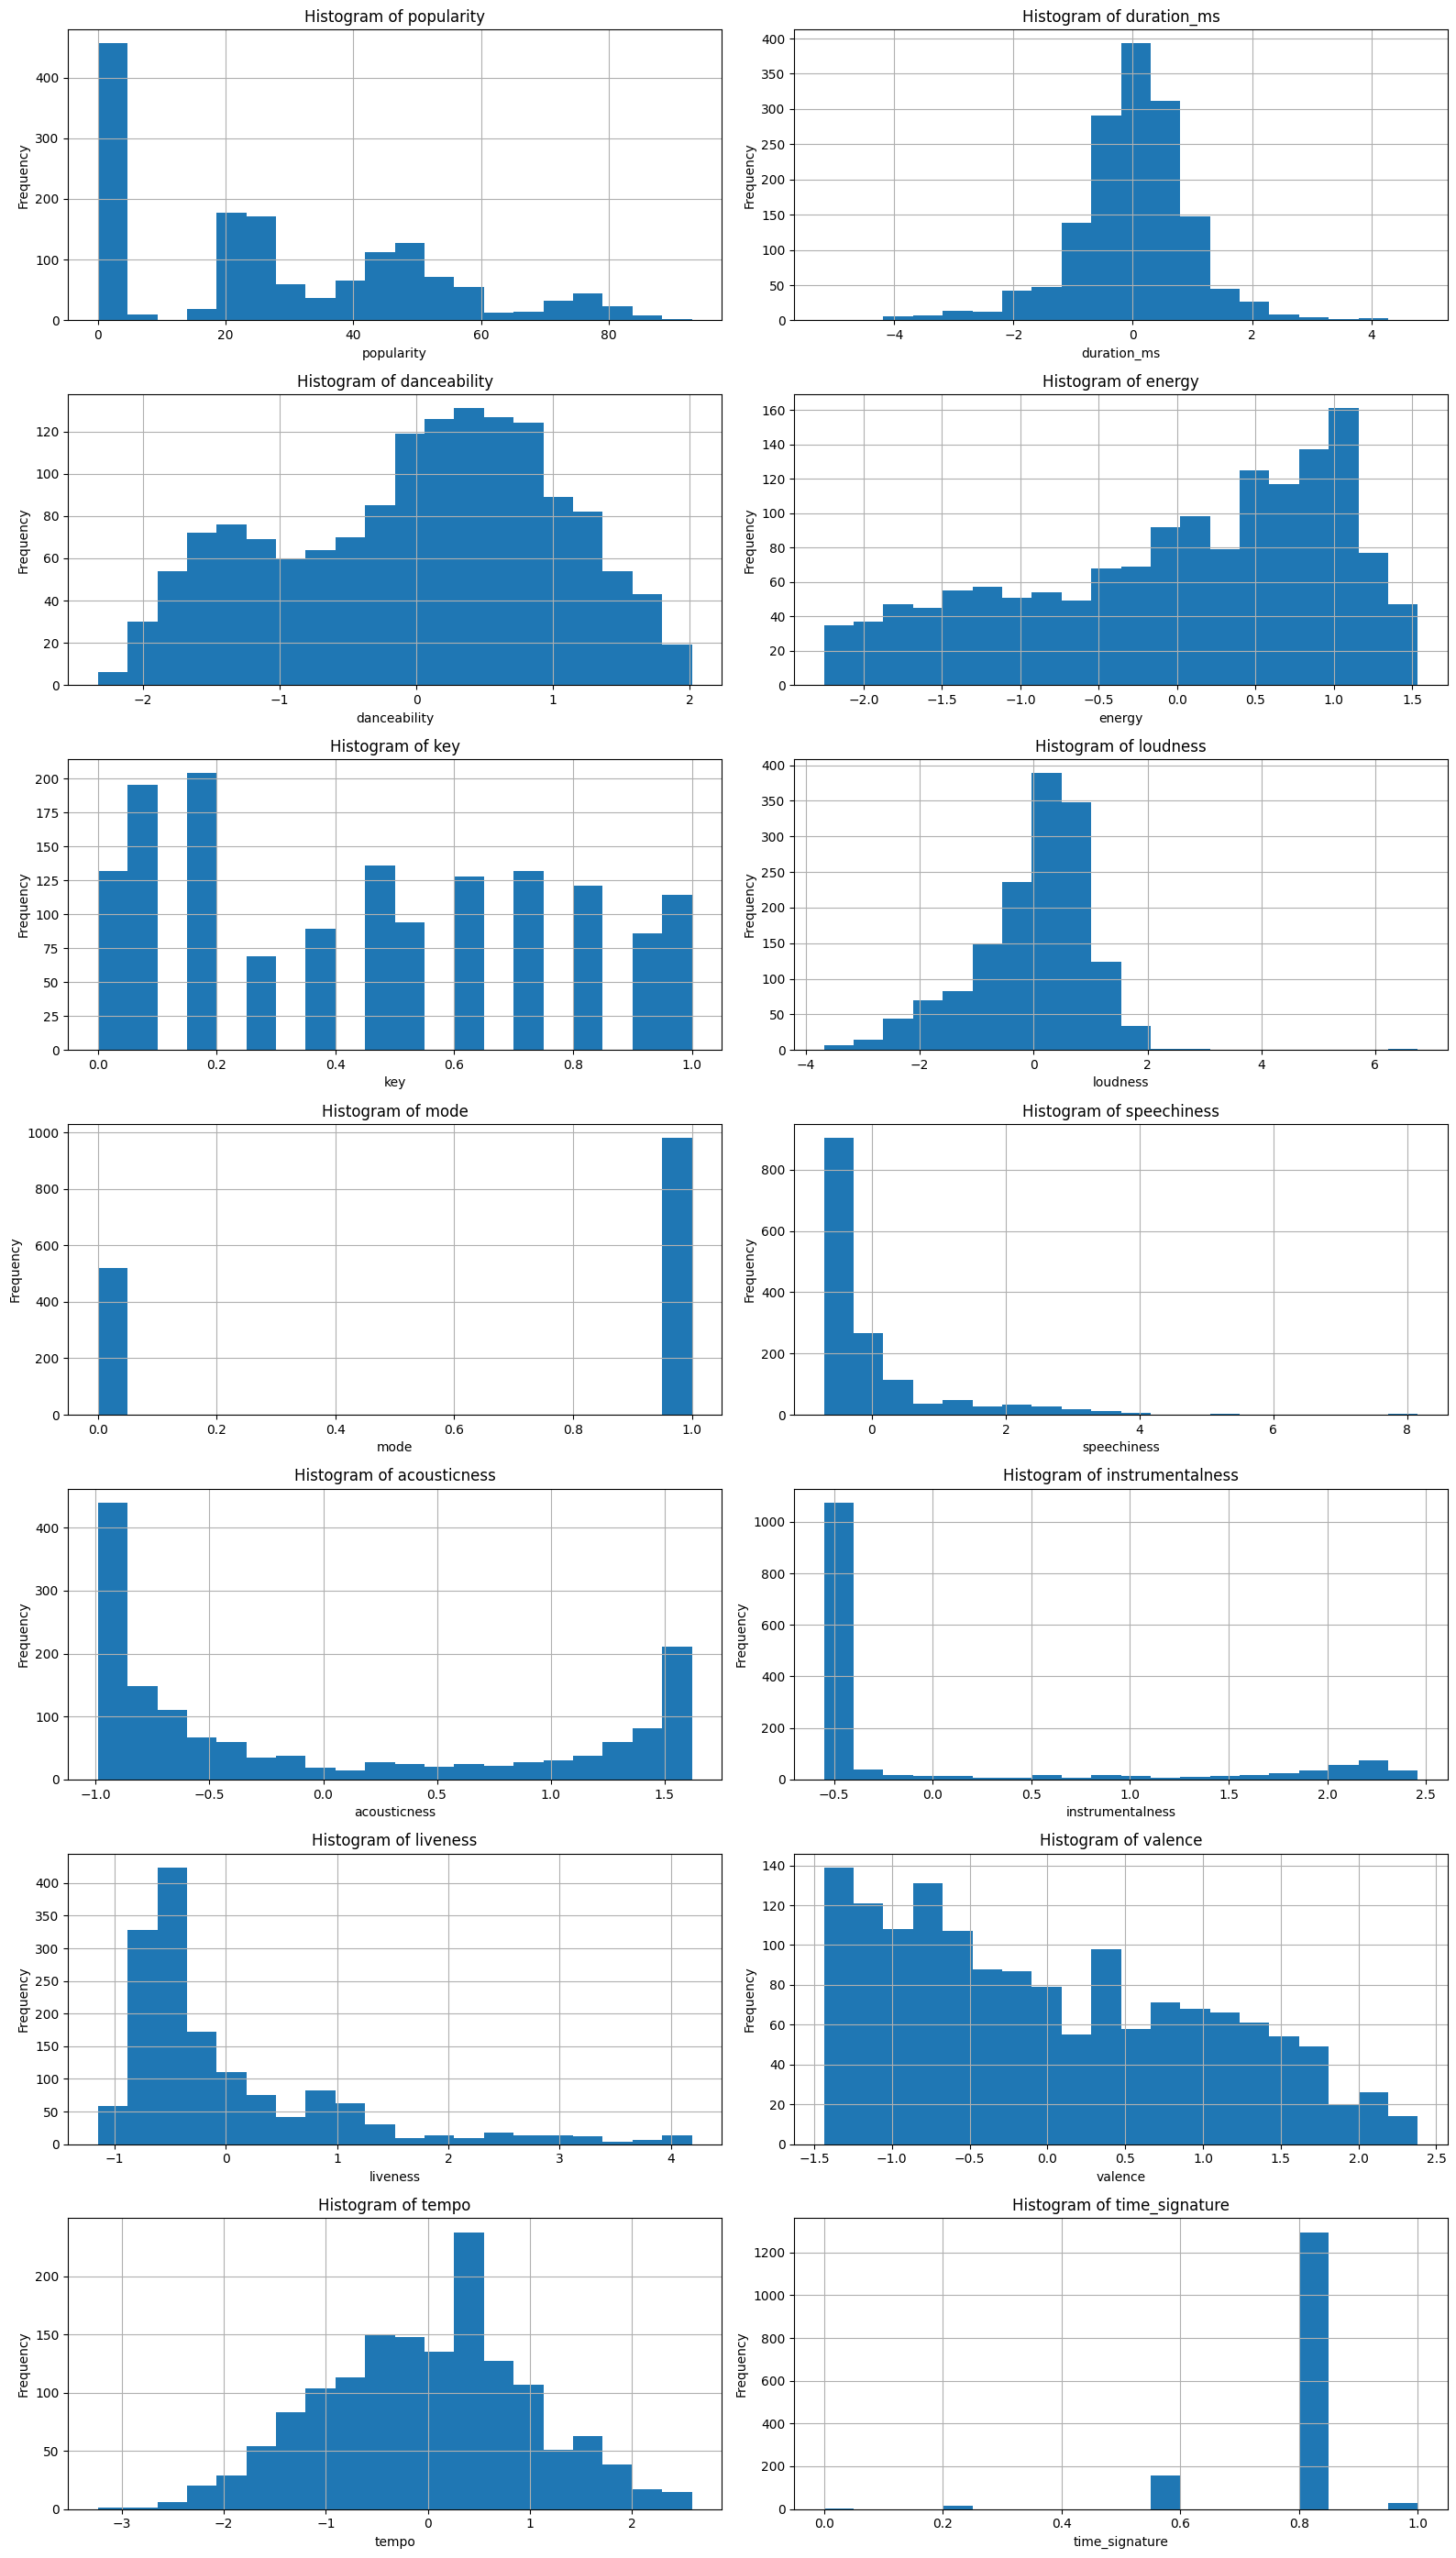

In [34]:
# Visualize Clusters with MDS
# Drop the 'cluster' column before concatenation
data_without_cluster = df.drop(columns=['cluster'])
data_and_centers = np.r_[data_without_cluster, kmeans.cluster_centers_]
mds_coordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(mds_coordinates[:-k], kmeans.labels_, mds_coordinates[-k:], "K-Means Clustering with MDS")

In [35]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,85,0.031060,True,0.566079,0.293351,0.181818,-0.905453,1,-0.544492,-0.653528,-0.546762,-0.493394,-0.863148,-0.476074,0.8,1
1,49,0.245546,False,0.416004,-0.342189,0.545455,-0.976185,1,-0.279526,-0.311185,-0.485810,-0.916223,-0.944368,-0.514974,0.8,1
2,65,-0.199603,False,1.287406,0.921234,0.818182,0.118302,0,-0.164193,-0.984930,1.310269,0.321596,-0.119992,0.392661,0.8,1
3,59,0.503923,False,1.001780,-0.173733,0.545455,0.472354,0,-0.137597,-0.980406,2.013846,0.074759,-0.737258,-0.473376,0.8,1
4,55,-0.216585,False,0.687107,1.051405,0.000000,0.648243,1,-0.327610,-0.987194,2.120494,0.142217,-0.647917,0.360054,0.8,1


In [36]:
df = df.drop(columns=['club', 'dance', 'opera'])

In [37]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [38]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, max_iter=10)
kmeans.fit(df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [39]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=10).fit(df)

In [40]:
data_and_centers = np.r_[df,clustered_data_sklearn.cluster_centers_]

In [41]:
df.tail()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
1495,23,1.826232,False,-1.297756,-1.808526,0.000000,-2.190526,0,-0.242860,1.551788,-0.536219,-0.876512,-1.240412,0.148795,0.8,0
1496,22,0.066290,False,-0.406988,-0.368989,0.545455,-0.218192,1,-0.537307,1.158029,-0.550826,0.681442,-0.716954,0.097856,0.8,0
1497,23,0.385016,False,-1.452672,-1.483099,0.090909,-1.502851,1,-0.528690,1.593956,-0.540911,-0.500663,-1.238787,-1.086560,0.2,0
1498,23,-0.961752,False,-1.263868,-1.479271,0.454545,-1.967787,1,-0.319113,1.514987,-0.549956,1.408344,-0.558576,-0.922002,0.8,0
1499,23,0.817174,False,-1.438148,-1.490756,0.272727,-1.401938,1,-0.538744,1.597767,0.699676,-0.760789,-1.232696,-1.884481,0.8,0


In [340]:
df.groupby('cluster').mean()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,,
0,26.720227,-0.002622,0.051040,-0.423545,-0.353843,0.447500,-0.405598,0.703214,0.040114,0.416702,0.098124,0.132412,-0.365000,-0.112415,0.762193
1,56.490079,-0.030509,0.073413,0.195007,0.192797,0.453824,0.158131,0.644841,-0.145528,-0.225983,0.196539,-0.127996,0.030440,0.039444,0.784127
2,0.481799,0.035897,0.199143,0.269318,0.192747,0.475959,0.288787,0.608137,0.111619,-0.228138,-0.323262,-0.011854,0.380606,0.084770,0.782869


## Elbow Method

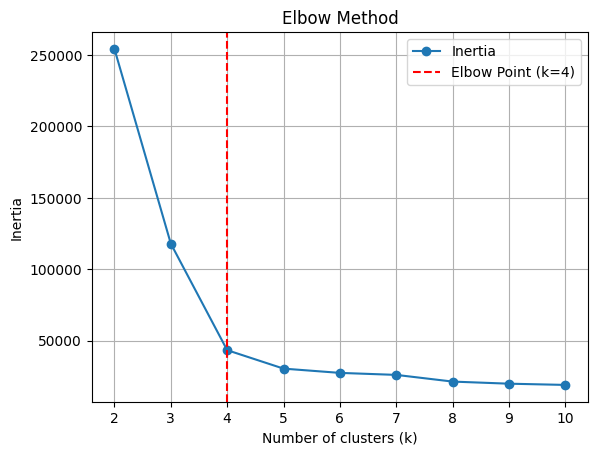

The optimal number of clusters (k) based on elbow point is: 4


In [341]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

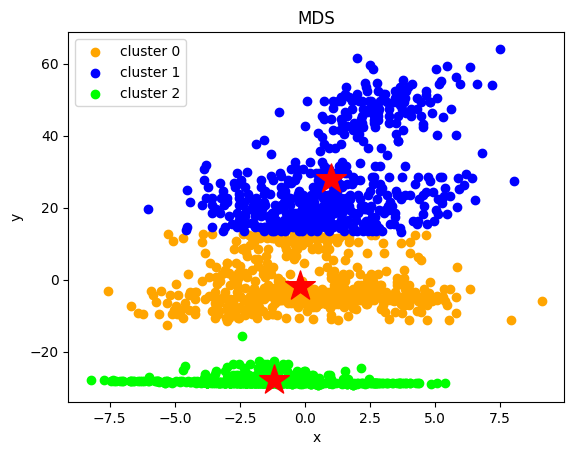

In [42]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [43]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


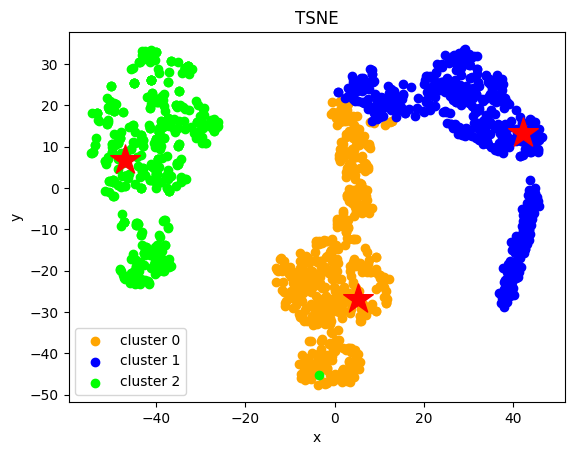

In [44]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

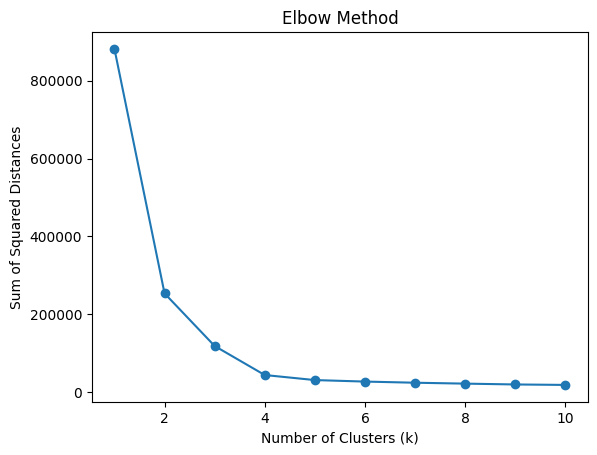

In [45]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

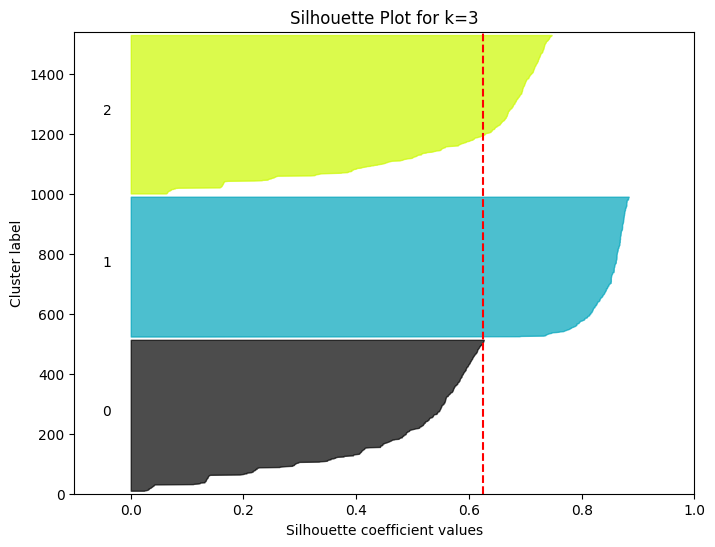

In [46]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
k = 3
silhouette_avg = silhouette_score(df, labels)
sample_silhouette_values = silhouette_samples(df, labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df) + (k + 1) * 10]) 

y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  

ax1.set_title(f"Silhouette Plot for k={k}")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

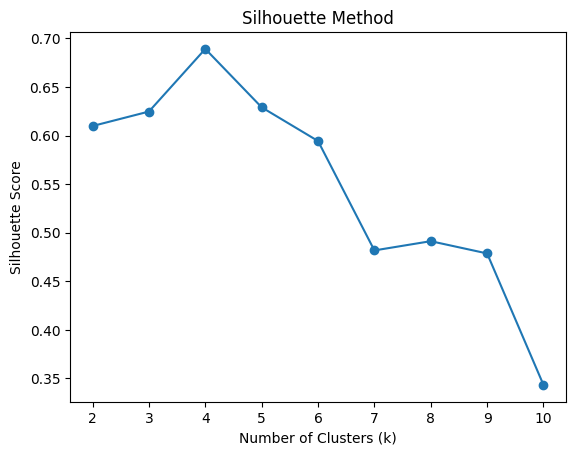

In [47]:
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k).fit(df)
    inertia.append(kmeans.inertia_)

# Find the elbow point using KneeLocator
knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
elbow_point = knee_locator.knee

# Plot the Elbow Method with the identified elbow point
plt.plot(k_values, inertia, marker="o", label="Inertia")
plt.axvline(x=elbow_point, color="red", linestyle="--", label=f"Elbow Point (k={elbow_point})")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.legend()
plt.grid()
plt.show()

print(f"The optimal number of clusters (k) based on elbow point is: {elbow_point}")

## Silhouette Analysis

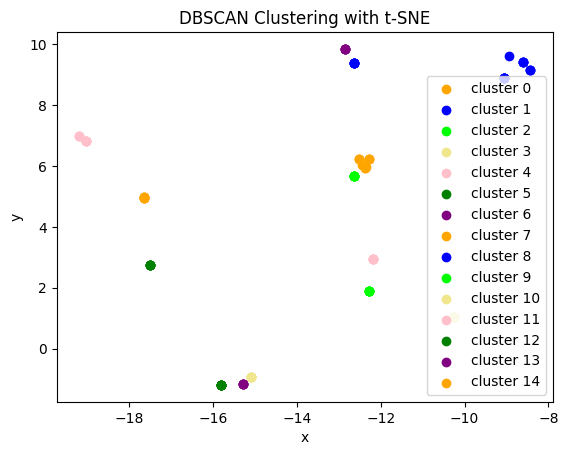

In [48]:
# Visualize Clusters with MDS
mds_coordinates = manifold.MDS(n_components=2).fit_transform(df)
clustering_scatterplot(mds_coordinates, db.labels_, None, "DBSCAN Clustering with MDS")

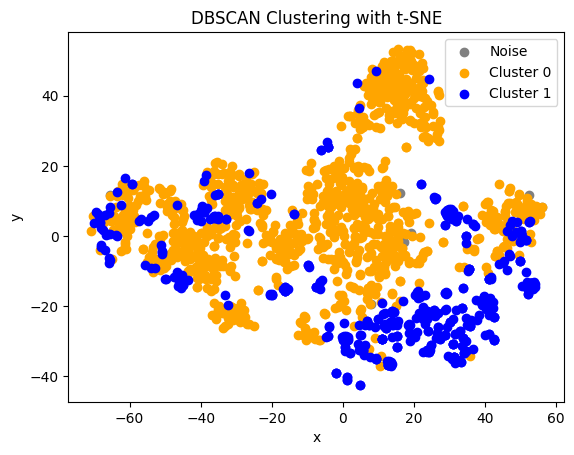

In [356]:
# Visualize Clusters with t-SNE
tsne_coordinates = manifold.TSNE(n_components=2).fit_transform(df)
clustering_scatterplot(tsne_coordinates, db.labels_, None, "DBSCAN Clustering with t-SNE")

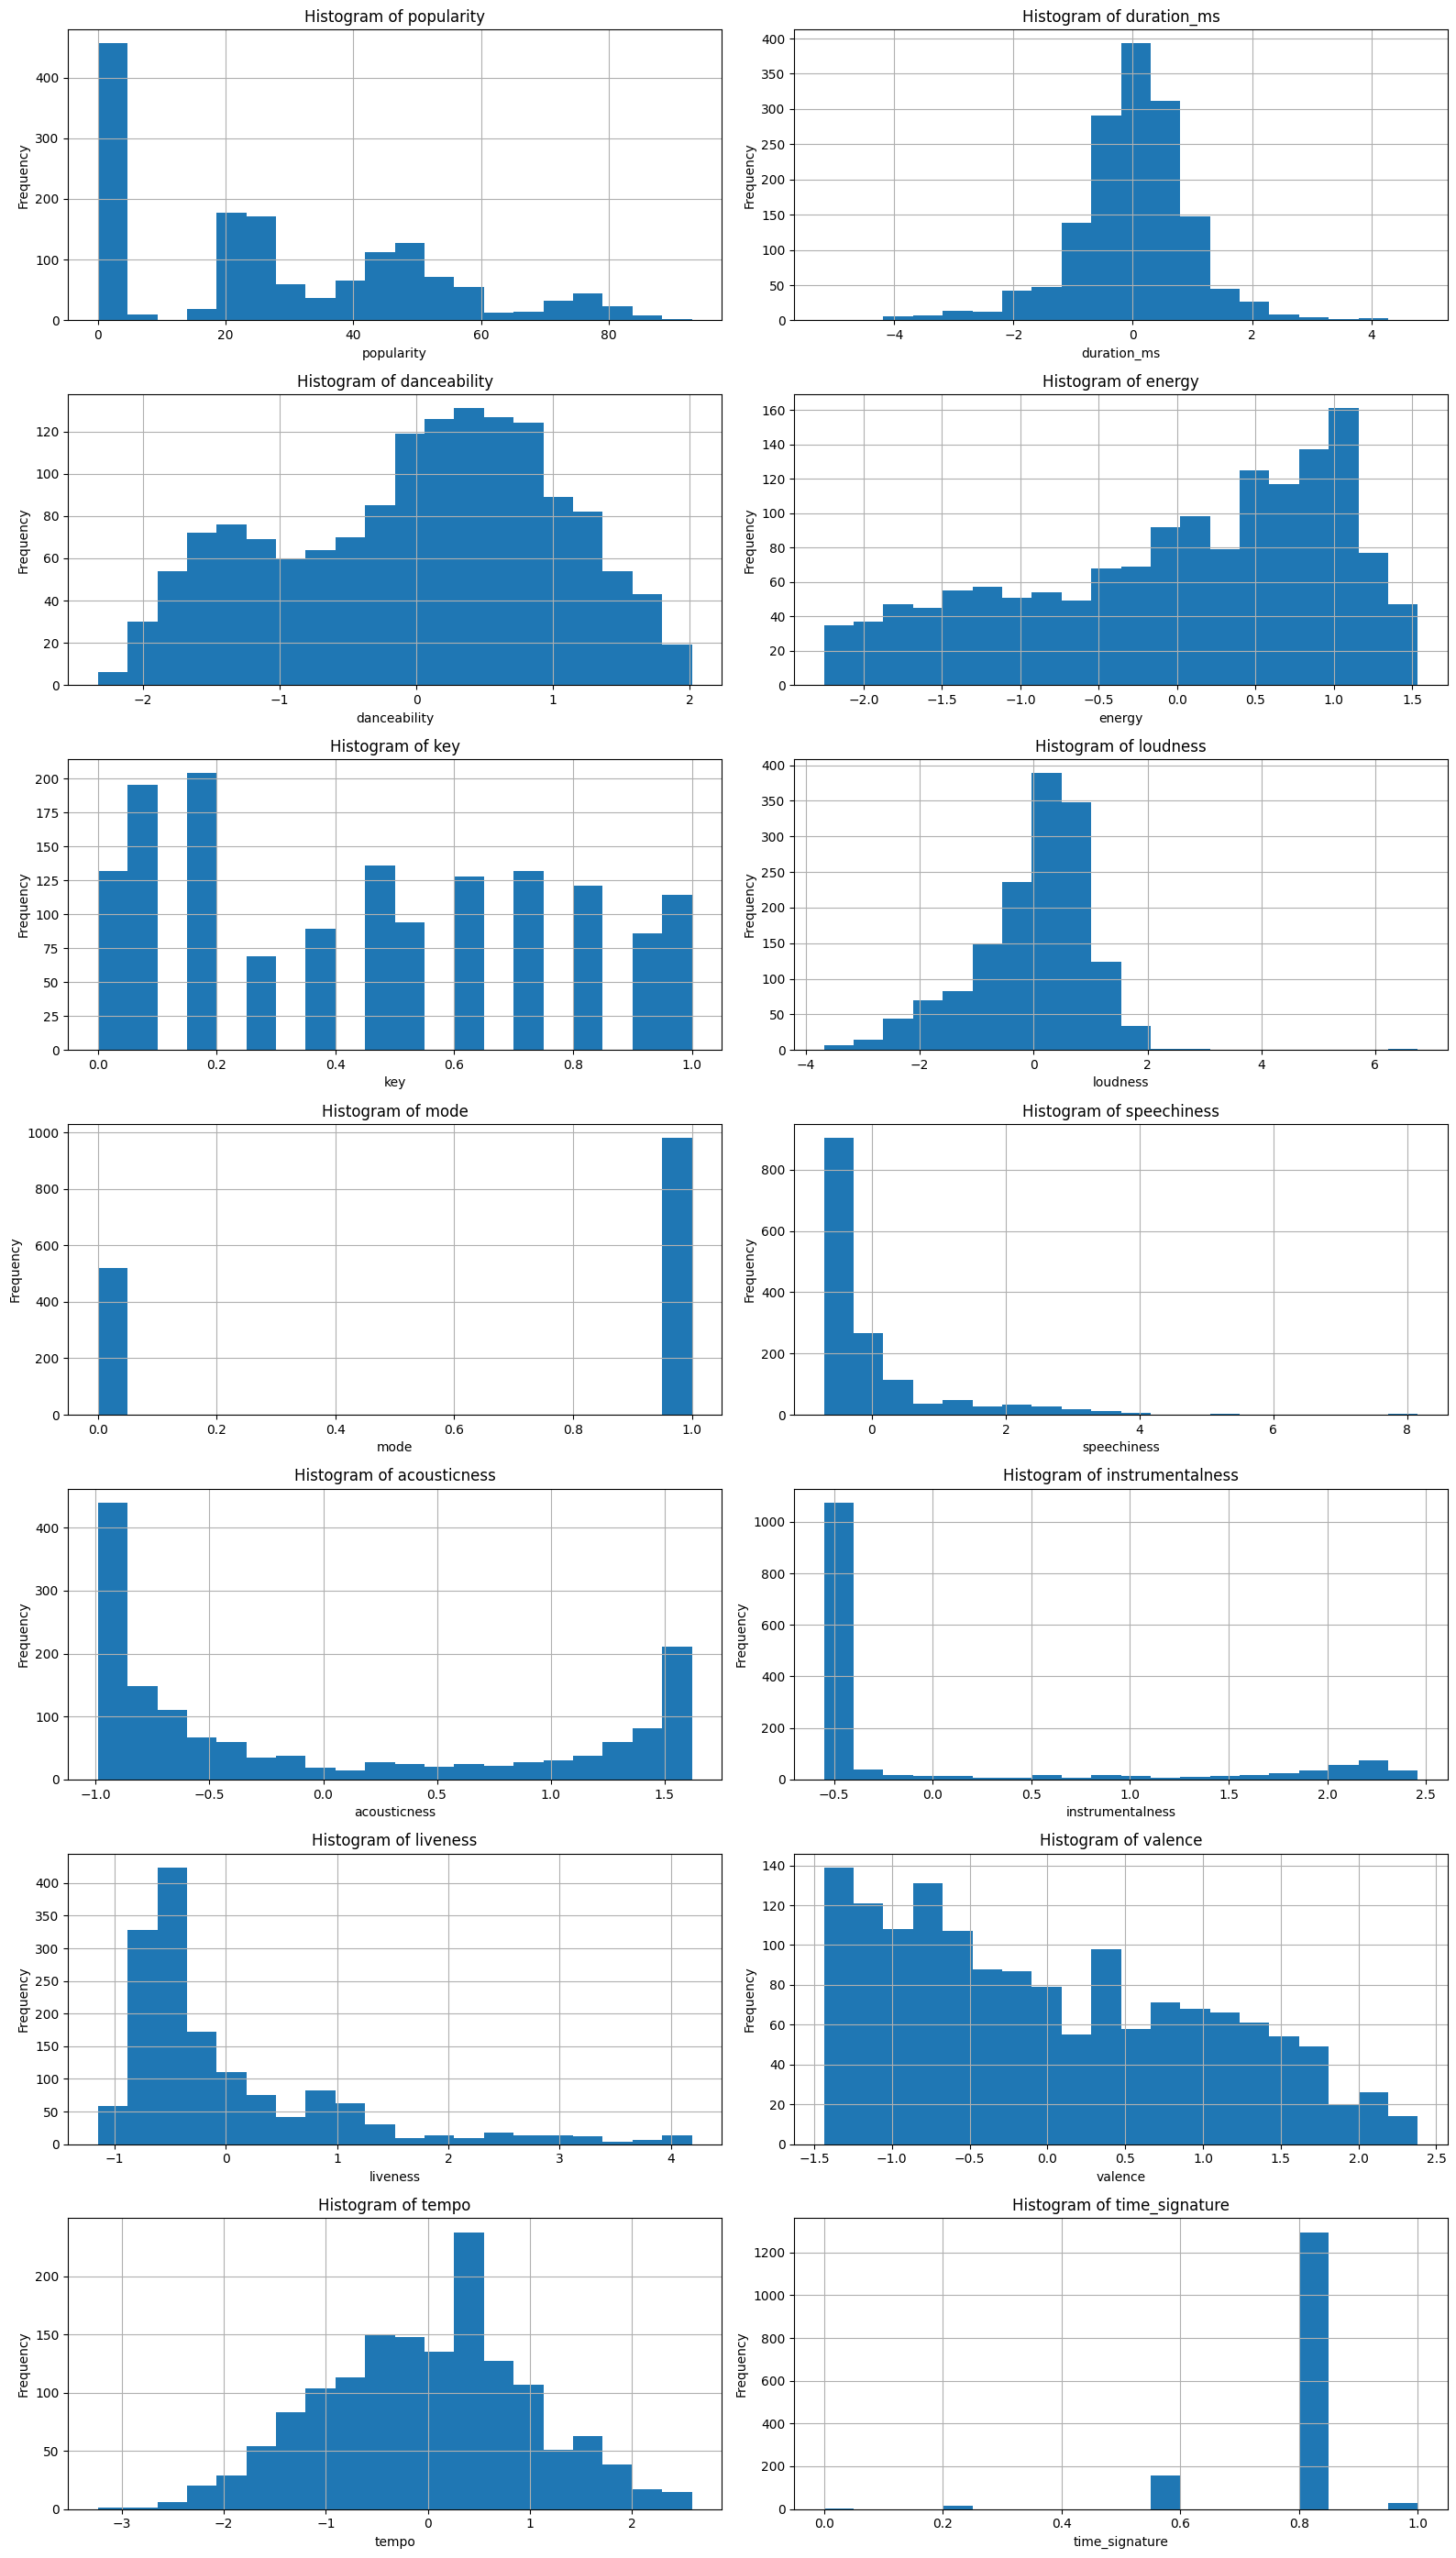

In [347]:
# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()

# Classification

In [49]:
# Median of Popularity
m = df['popularity'].median()

# Replace column popularity with popularity_binary 0 for popularity <= m and 1 for popularity > m
df['popularity_binary'] = df['popularity'].apply(lambda x: 1 if x > m else 0)
df.drop(columns=['popularity'], inplace=True)

In [50]:
df.head()


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,popularity_binary
0,0.031060,True,0.566079,0.293351,0.181818,-0.905453,1,-0.544492,-0.653528,-0.546762,-0.493394,-0.863148,-0.476074,0.8,0,1
1,0.245546,False,0.416004,-0.342189,0.545455,-0.976185,1,-0.279526,-0.311185,-0.485810,-0.916223,-0.944368,-0.514974,0.8,0,1
2,-0.199603,False,1.287406,0.921234,0.818182,0.118302,0,-0.164193,-0.984930,1.310269,0.321596,-0.119992,0.392661,0.8,0,1
3,0.503923,False,1.001780,-0.173733,0.545455,0.472354,0,-0.137597,-0.980406,2.013846,0.074759,-0.737258,-0.473376,0.8,0,1
4,-0.216585,False,0.687107,1.051405,0.000000,0.648243,1,-0.327610,-0.987194,2.120494,0.142217,-0.647917,0.360054,0.8,0,1


In [51]:
y = df['popularity_binary']
X = df.drop('popularity_binary', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [53]:
# create the pipeline
pipe = Pipeline(steps=[('svm', svm.SVC(probability=True))])

In [54]:
set_config(display="diagram")
pipe

Pipeline(steps=[('svm', SVC(probability=True))])

In [55]:
# prepare a parameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of svn.SVC and their possible values

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #training happens here! SVM is trained 48x5 = 240 times

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_

Best CV score = 0.703:
Best parameters:  {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}


In [58]:
pipe = Pipeline(steps=[ ('rf', RandomForestClassifier())])

In [63]:
param_grid = {
    'rf__n_estimators': [50, 100,150, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__bootstrap': [True, False]
}


search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=50, 
                            n_jobs=4, cv=5, refit=True, random_state=42)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.729:
Best parameters:  {'rf__n_estimators': 100, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 'rf__max_depth': 20, 'rf__bootstrap': False}


In [66]:
pipe = Pipeline([('gb', HistGradientBoostingClassifier(random_state=42))])

In [67]:
param_grid = {
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_iter': [100, 200, 300],
    'gb__max_depth': [3, 5, 7],
    'gb__min_samples_leaf': [20, 30, 50]
}

search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=20,
                            n_jobs=4, cv=5, refit=True, random_state=42, verbose=2)

search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
gb_best_params = search.best_params_
gb_best_model = search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CV score = 0.718:
Best parameters:  {'gb__min_samples_leaf': 20, 'gb__max_iter': 100, 'gb__max_depth': 7, 'gb__learning_rate': 0.1}
